In [79]:
import pandas as pd # read CSV file, data processing
import numpy as np # recommendation system
import matplotlib.pyplot as plt # data visualisation 
import seaborn as sns # data visualisation
import string

In [85]:
df = pd.read_csv("dataset - 2020-09-24.csv")

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [87]:
df.shape

(571, 59)

In [88]:
df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [89]:
df.tail()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
566,Pedro Neto,7.0,Wolverhampton-Wanderers,Forward,Portugal,20.0,31,14,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,16,5.0
567,Raúl Jiménez,9.0,Wolverhampton-Wanderers,Forward,Mexico,29.0,78,32,23,32,...,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.0
568,Adama Traoré,37.0,Wolverhampton-Wanderers,Forward,Spain,24.0,105,27,47,5,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,80,13.0
569,Fábio Silva,17.0,Wolverhampton-Wanderers,Forward,Portugal,18.0,1,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
570,Leonardo Campana,30.0,Wolverhampton-Wanderers,Forward,Ecuador,20.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0


In [90]:
df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [91]:
df.describe()

,Jersey Number,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
count,563.000000,570.000000,571.000000,571.000000,571.000000,571.000000,309.000000,502.000000,502.000000,502.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,571.000000,571.000000,571.000000,502.000000
mean,19.534636,25.789474,68.823117,28.957968,23.896673,7.327496,2.648414,1.414343,4.468127,2.388446,...,24.652174,45.869565,20.782609,25.565217,210.000000,414.144928,7.917688,0.301226,53.033275,11.063745
std,14.273515,4.377354,81.797516,38.969376,28.488376,16.810490,8.002117,3.433374,11.048341,6.295652,...,46.282644,82.332167,43.058397,47.333758,334.822473,641.246265,11.556811,0.698607,75.605560,26.570058
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,22.000000,3.000000,1.000000,1.000000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,26.000000,36.000000,12.000000,14.000000,1.000000,0.140000,0.000000,1.000000,0.000000,...,2.000000,6.000000,3.000000,4.000000,39.000000,53.000000,3.000000,0.000000,22.000000,2.000000
75%,27.000000,29.000000,108.000000,41.000000,36.000000,6.000000,0.390000,1.000000,3.000000,2.000000,...,31.000000,45.000000,17.000000,28.000000,300.000000,527.000000,11.000000,0.000000,74.000000,8.750000
max,82.000000,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,31.000000,127.000000,63.000000,...,269.000000,391.000000,249.000000,257.000000,1516.000000,2806.000000,81.000000,5.000000,438.000000,203.000000


In [92]:
premfootball_df = df.copy()

In [93]:
premfootball_df.describe()

,Jersey Number,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
count,563.000000,570.000000,571.000000,571.000000,571.000000,571.000000,309.000000,502.000000,502.000000,502.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,571.000000,571.000000,571.000000,502.000000
mean,19.534636,25.789474,68.823117,28.957968,23.896673,7.327496,2.648414,1.414343,4.468127,2.388446,...,24.652174,45.869565,20.782609,25.565217,210.000000,414.144928,7.917688,0.301226,53.033275,11.063745
std,14.273515,4.377354,81.797516,38.969376,28.488376,16.810490,8.002117,3.433374,11.048341,6.295652,...,46.282644,82.332167,43.058397,47.333758,334.822473,641.246265,11.556811,0.698607,75.605560,26.570058
min,1.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,22.000000,3.000000,1.000000,1.000000,0.000000,0.050000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,26.000000,36.000000,12.000000,14.000000,1.000000,0.140000,0.000000,1.000000,0.000000,...,2.000000,6.000000,3.000000,4.000000,39.000000,53.000000,3.000000,0.000000,22.000000,2.000000
75%,27.000000,29.000000,108.000000,41.000000,36.000000,6.000000,0.390000,1.000000,3.000000,2.000000,...,31.000000,45.000000,17.000000,28.000000,300.000000,527.000000,11.000000,0.000000,74.000000,8.750000
max,82.000000,38.000000,539.000000,272.000000,158.000000,180.000000,57.000000,31.000000,127.000000,63.000000,...,269.000000,391.000000,249.000000,257.000000,1516.000000,2806.000000,81.000000,5.000000,438.000000,203.000000


In [94]:
df.info

<bound method DataFrame.info of                      Name  Jersey Number                     Club    Position  \
0              Bernd Leno            1.0                  Arsenal  Goalkeeper   
1              Matt Macey           33.0                  Arsenal  Goalkeeper   
2    Rúnar Alex Rúnarsson           13.0                  Arsenal  Goalkeeper   
3         Héctor Bellerín            2.0                  Arsenal    Defender   
4          Kieran Tierney            3.0                  Arsenal    Defender   
..                    ...            ...                      ...         ...   
566            Pedro Neto            7.0  Wolverhampton-Wanderers     Forward   
567          Raúl Jiménez            9.0  Wolverhampton-Wanderers     Forward   
568          Adama Traoré           37.0  Wolverhampton-Wanderers     Forward   
569           Fábio Silva           17.0  Wolverhampton-Wanderers     Forward   
570      Leonardo Campana           30.0  Wolverhampton-Wanderers     Forward

In [95]:
df.shape

(571, 59)

In [96]:
by_goals = 

SyntaxError: invalid syntax (<ipython-input-96-3b1241643ac6>, line 1)

In [97]:
premtopscorers = df[["Name","Goals"]]


In [16]:
premtopscorers.head()

,Name,Goals
0,Bernd Leno,0
1,Matt Macey,0
2,Rúnar Alex Rúnarsson,0
3,Héctor Bellerín,7
4,Kieran Tierney,1


In [17]:
premtopscorers.count()
graphdata = premtopscorers.sort_values('Goals',ascending = False).head(10)
graphdata.head()

,Name,Goals
344,Sergio Agüero,180
489,Harry Kane,144
281,Jamie Vardy,105
313,Sadio Mané,86
140,Olivier Giroud,86


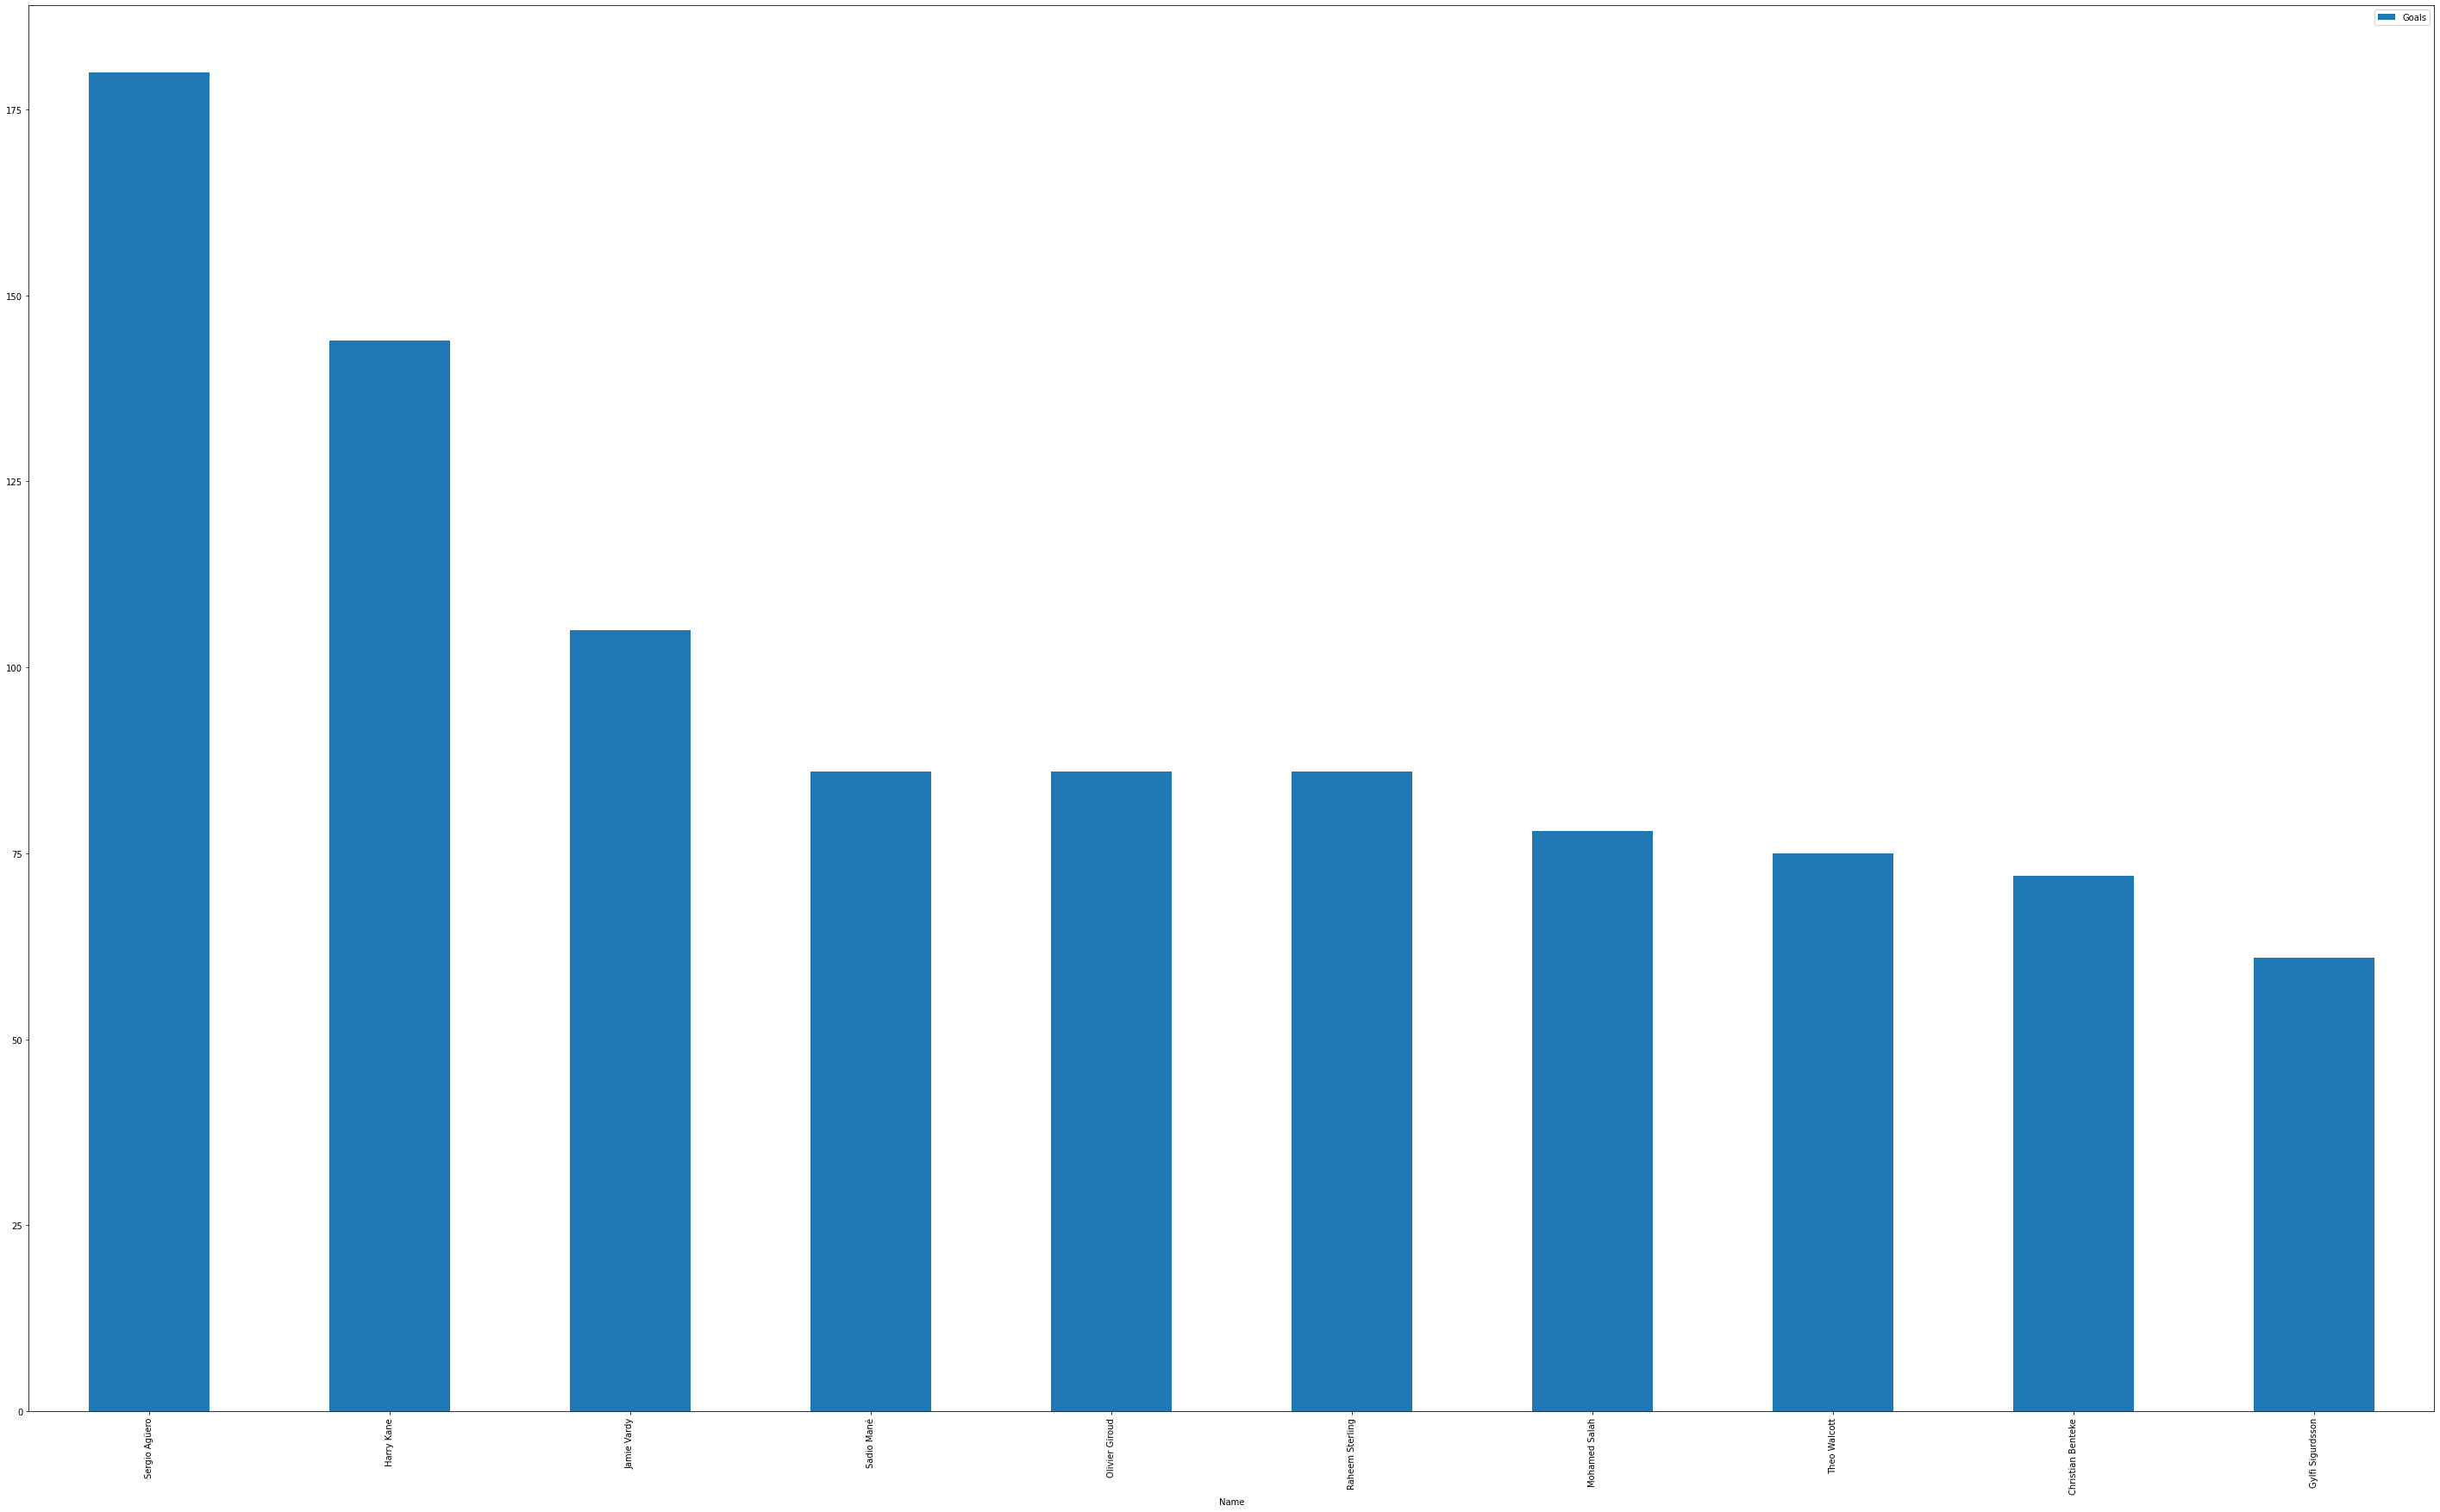

In [18]:
plt = graphdata.plot(kind='bar', figsize=(50,30), legend=True, x = "Name", y = "Goals")


In [19]:
staticball = df[["Name","Penalties scored","Freekicks scored"]]
staticball.head()

,Name,Penalties scored,Freekicks scored
0,Bernd Leno,NaN,NaN
1,Matt Macey,NaN,NaN
2,Rúnar Alex Rúnarsson,NaN,NaN
3,Héctor Bellerín,NaN,NaN
4,Kieran Tierney,NaN,NaN


In [20]:
#Data cleanup
staticball = staticball[staticball["Freekicks scored"].notna()]
staticball = staticball[staticball["Penalties scored"].notna()]

staticball[["Freekicks scored"]].head()

,Freekicks scored
13,1.0
14,0.0
15,0.0
16,0.0
17,0.0


In [21]:
staticball['All Static Ball'] = staticball["Freekicks scored"] + staticball["Penalties scored"]

In [22]:
staticball[['Name','Freekicks scored','Penalties scored','All Static Ball']].head()
Top5staticball = staticball[['Name','Freekicks scored','Penalties scored','All Static Ball']].sort_values('All Static Ball',ascending = False).head(5)
Top5staticball.head()

,Name,Freekicks scored,Penalties scored,All Static Ball
537,Mark Noble,2.0,27.0,29.0
344,Sergio Agüero,0.0,26.0,26.0
157,Luka Milivojevic,3.0,21.0,24.0
489,Harry Kane,1.0,20.0,21.0
302,James Milner,4.0,17.0,21.0


<AxesSubplot:xlabel='Name'>

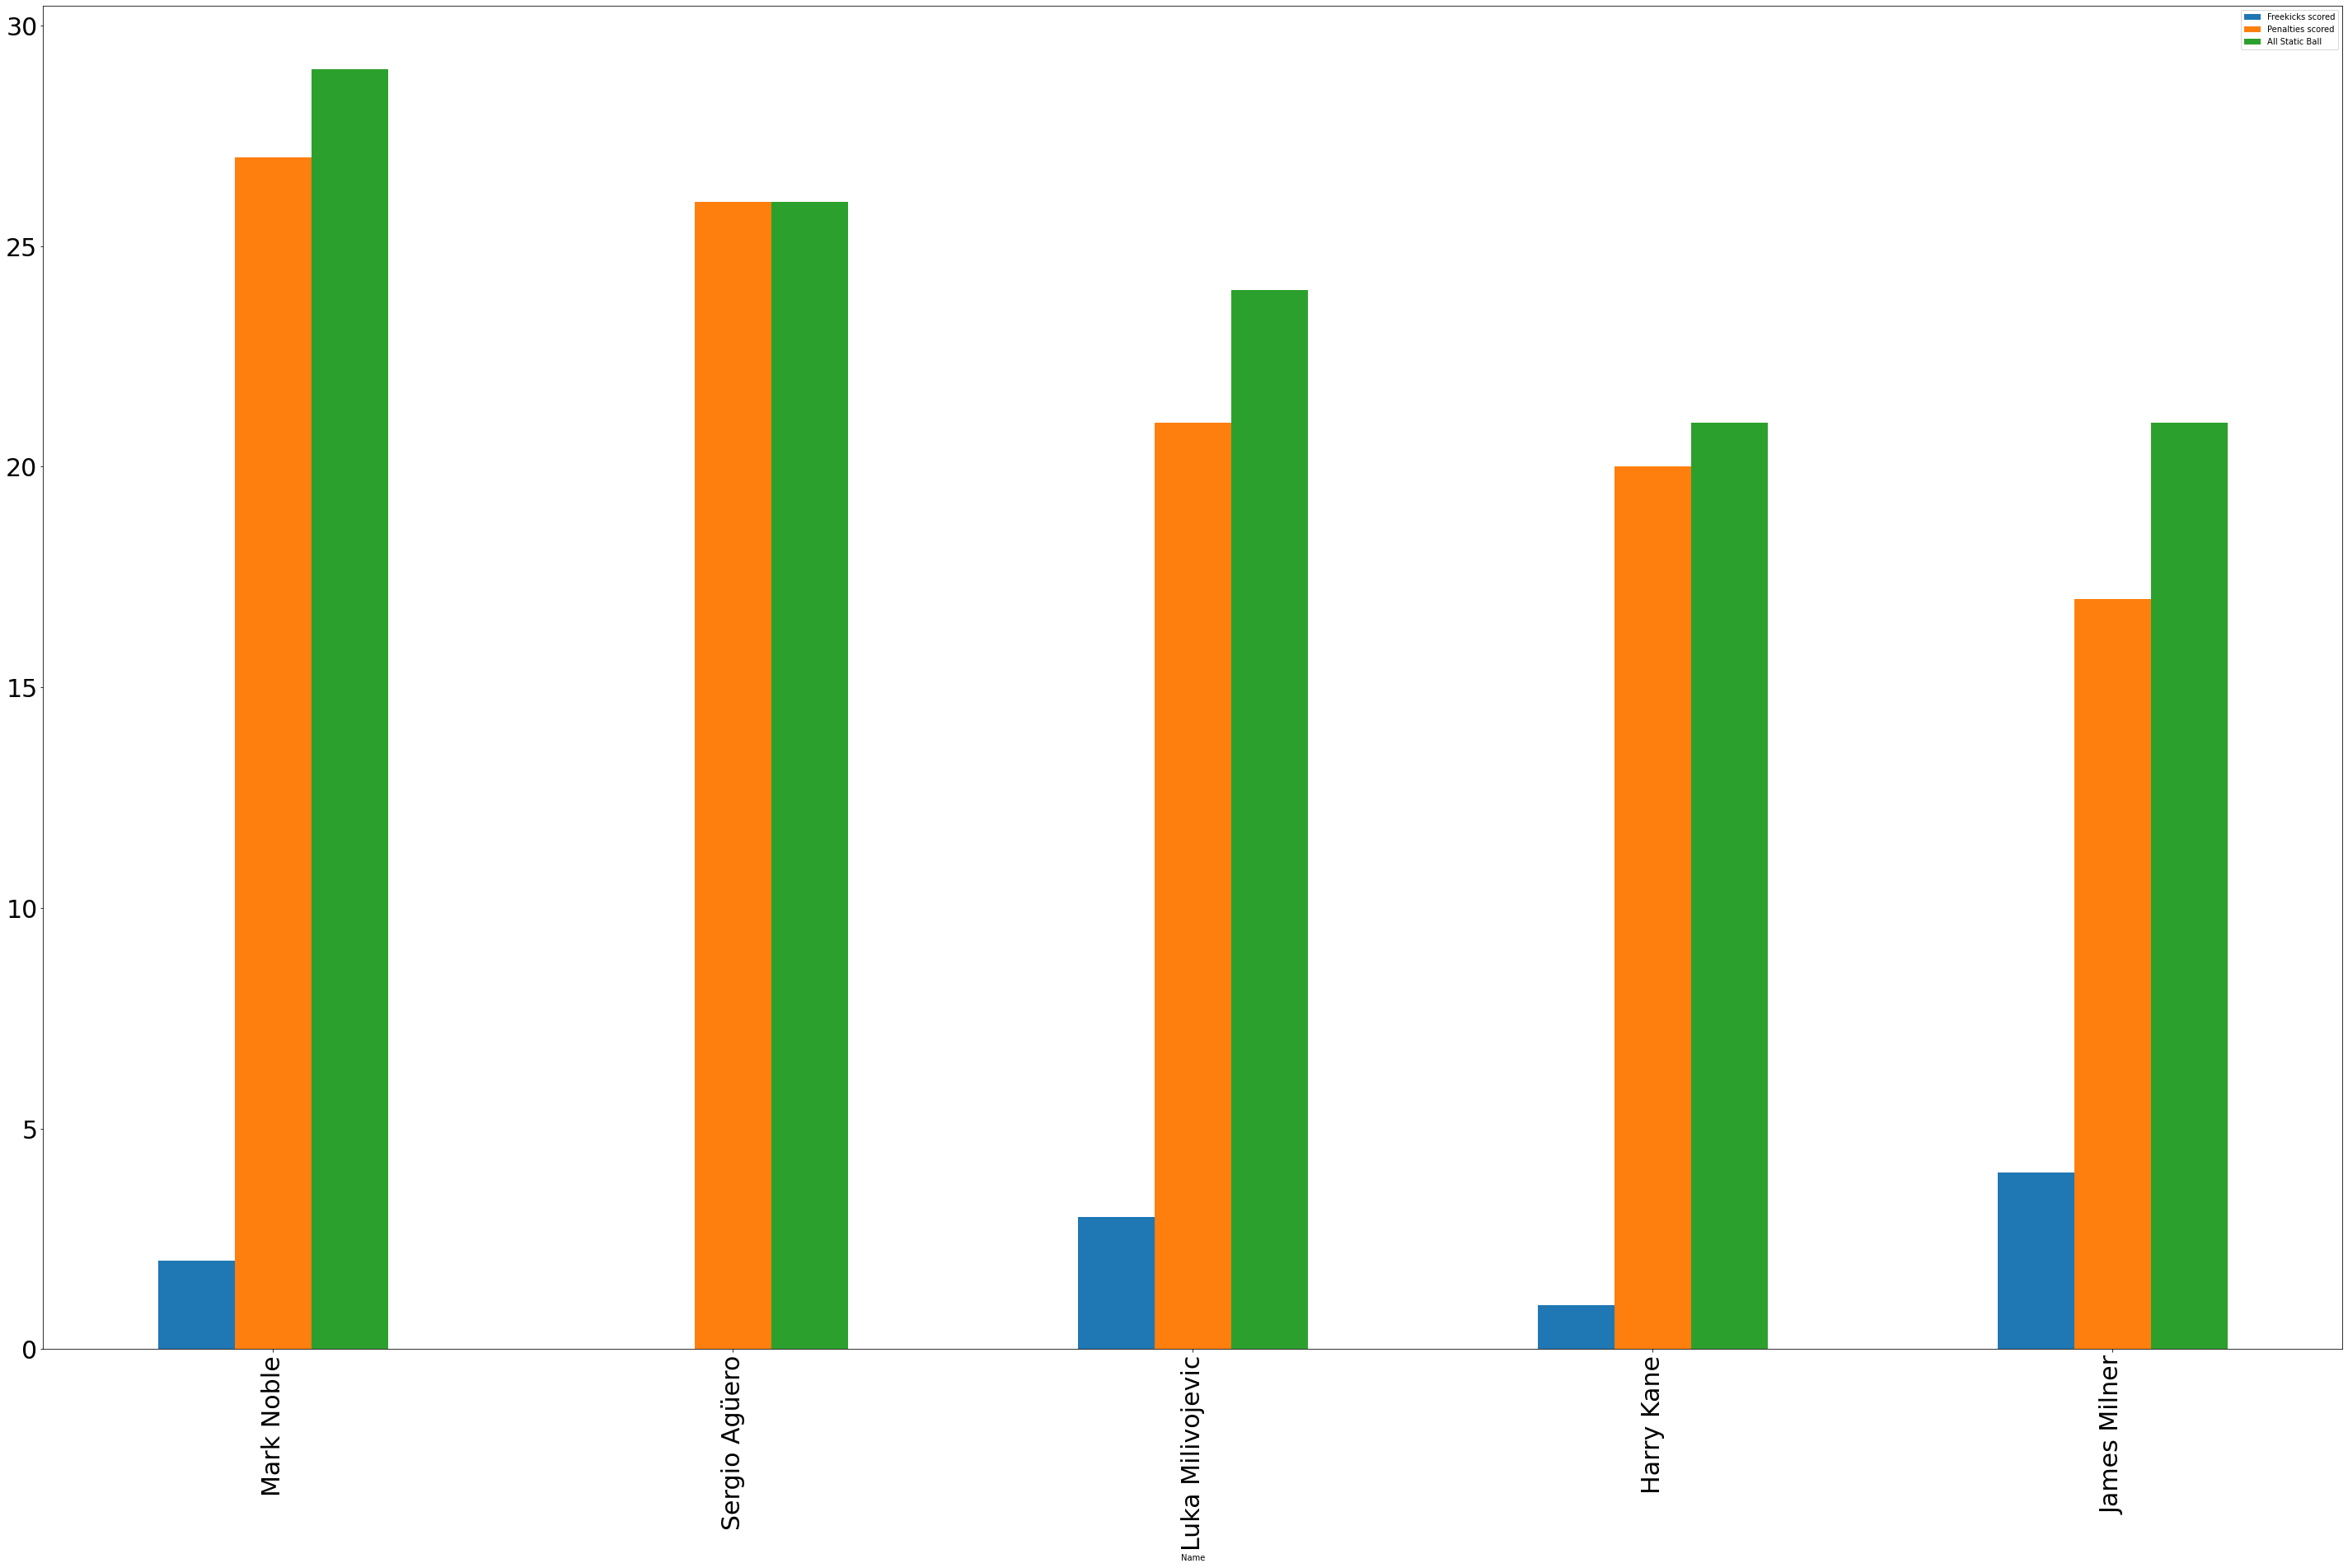

In [23]:
Top5staticball.plot(kind="bar", x="Name", y=["Freekicks scored", "Penalties scored", "All Static Ball"], figsize=(50, 30), fontsize=30, legend=True)

In [24]:
mostaggressive = df[["Name","Yellow cards","Red cards","Fouls"]]
mostaggressive.head()

,Name,Yellow cards,Red cards,Fouls
0,Bernd Leno,2,0,0
1,Matt Macey,0,0,0
2,Rúnar Alex Rúnarsson,0,0,0
3,Héctor Bellerín,23,0,125
4,Kieran Tierney,2,0,9


In [25]:
#Data cleanup most aggressive
mostaggressive = mostaggressive[mostaggressive["Yellow cards"].notna()]
mostaggressive = mostaggressive[mostaggressive["Red cards"].notna()]
mostaggressive = mostaggressive[mostaggressive["Fouls"].notna()]

mostaggressive[["Yellow cards"]].head()

,Yellow cards
0,2
1,0
2,0
3,23
4,2


In [26]:
mostaggressive['Most Aggressive Player'] = mostaggressive["Yellow cards"] + mostaggressive["Red cards"] + mostaggressive["Fouls"]

In [27]:
mostaggressive[['Name','Yellow cards','Red cards','Fouls']].head()
Top5aggressive = mostaggressive[['Name','Yellow cards','Red cards','Fouls','Most Aggressive Player']].sort_values('Most Aggressive Player',ascending = False).head(5)
Top5aggressive.head()

,Name,Yellow cards,Red cards,Fouls,Most Aggressive Player
302,James Milner,65,3,438,506
537,Mark Noble,81,5,380,466
456,Shane Long,28,0,395,423
162,James McArthur,45,0,370,415
99,Phil Bardsley,78,2,327,407


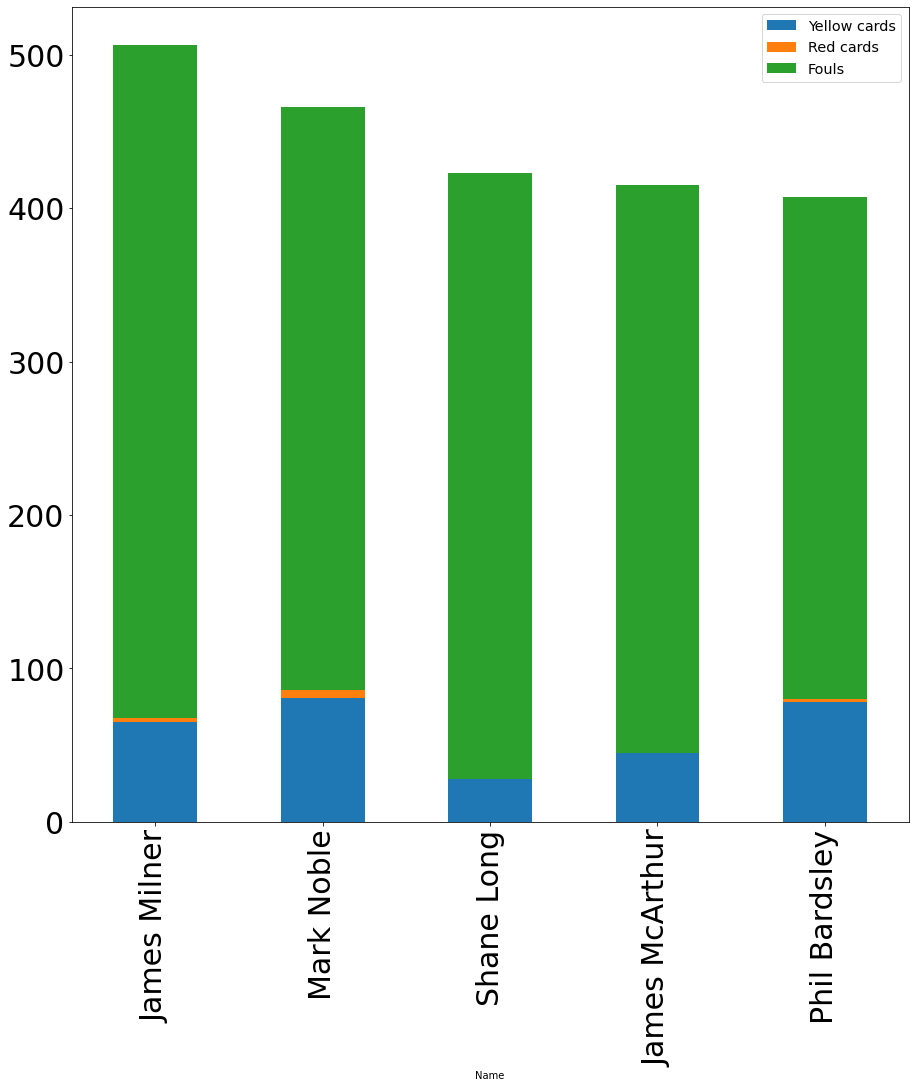

In [142]:
# plt.legend(fontsize="x-large")
Top5aggressive.plot(kind='bar',x = 'Name',y = ['Yellow cards','Red cards','Fouls'],figsize=(15, 15), fontsize=30, legend=True, stacked = True)
plt.legend(fontsize="x-large")


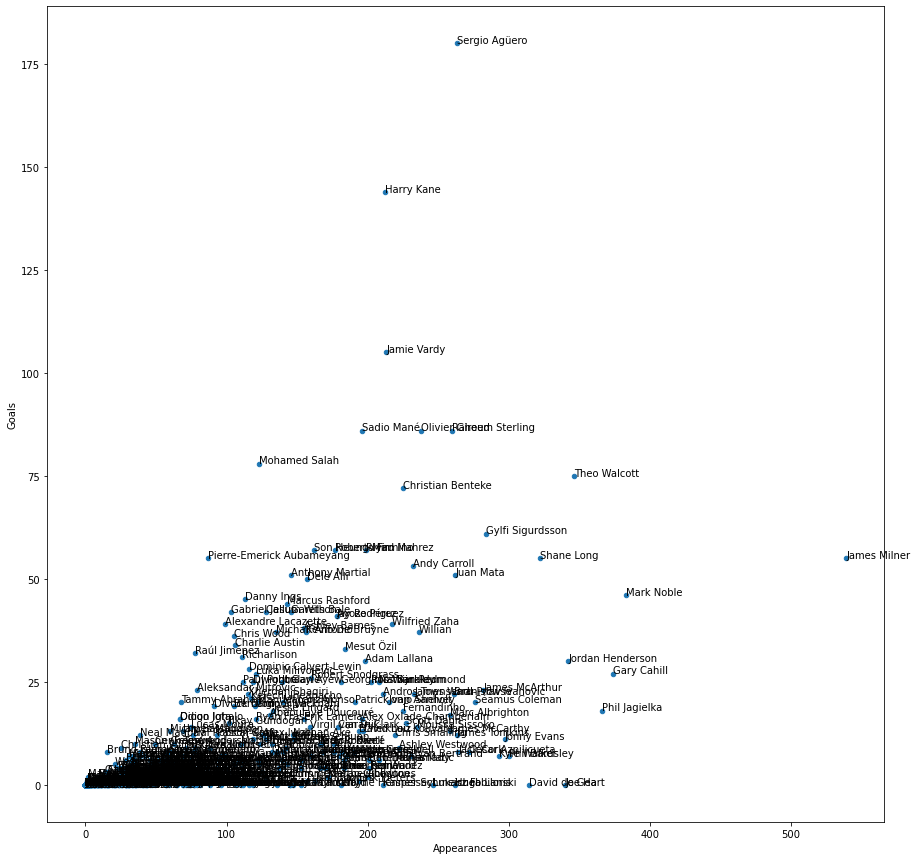

In [144]:
n=df['Name']
z=df['Appearances']
y=df['Goals']
Scatter = df.plot.scatter(x='Appearances',
                    y='Goals',
#                     c='Wins',
#                     colormap='viridis',
                    figsize=(15, 15))
for i, txt in enumerate(n):
    Scatter.annotate(txt, (z[i], y[i]))

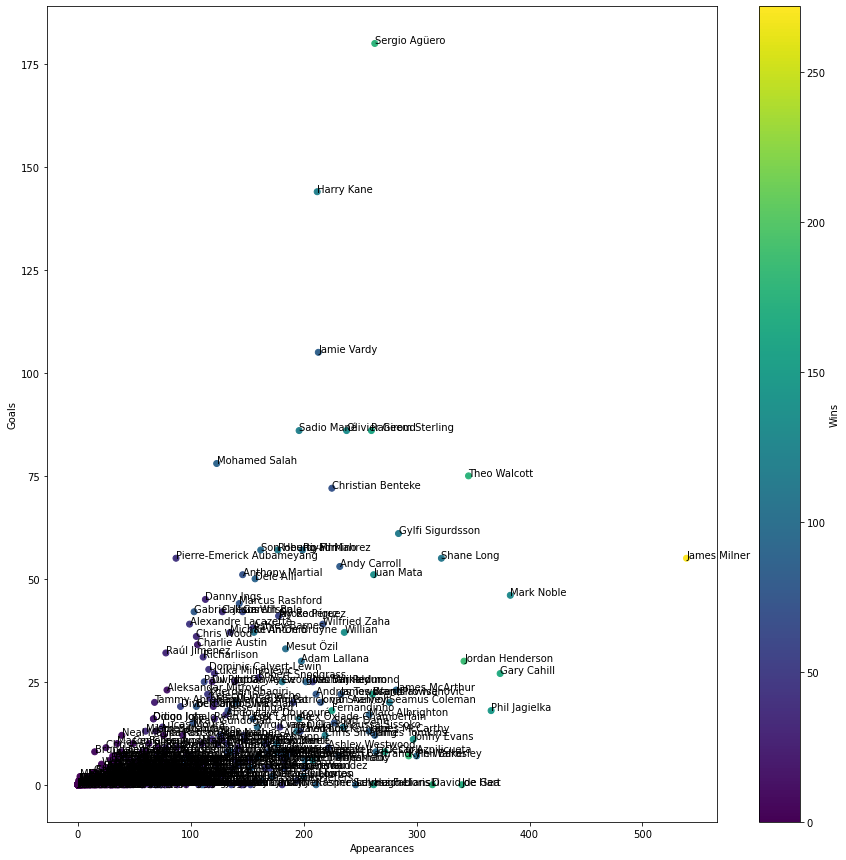

In [137]:
plt.figure(figsize=(15,15))
plt.scatter(x=df['Appearances'], y=df['Goals'], c=df['Wins'], cmap='viridis')
cbar = plt.colorbar()
cbar.set_label('Wins')
ax = plt.gca()
ax.set_xlabel('Appearances')
ax.set_ylabel('Goals')
myn=df['Name']
for i, txt in enumerate(myn):
    plt.annotate(txt, (df['Appearances'][i], df['Goals'][i]))

Lets look at the win percentage and goals scored by players searching for any correlations

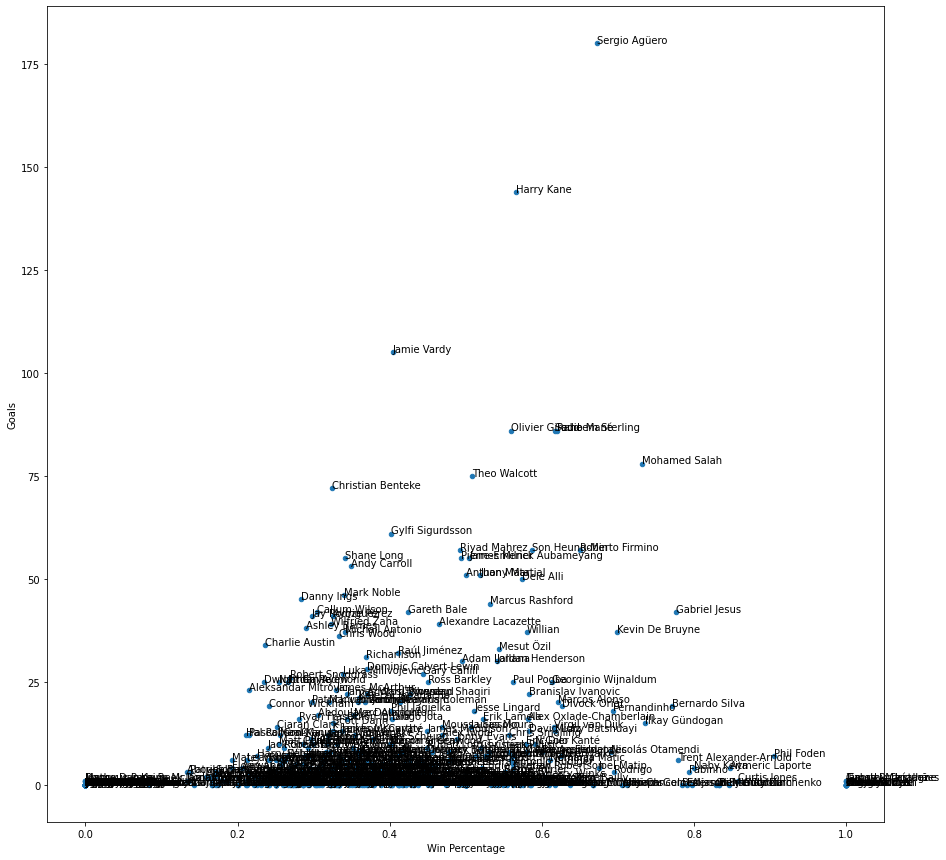

In [121]:
df['Win Percentage']=df['Wins']/df['Appearances'] #create a win percentage column
df['Win Percentage']=df['Win Percentage'].fillna(0) #some players have 0 apperances so their result will be NaN

n=df['Name']
z=df['Win Percentage']
y=df['Goals']
Scatter = df.plot.scatter(x='Win Percentage',
                    y='Goals',
                    figsize=(15, 15))
for i, txt in enumerate(n):
    Scatter.annotate(txt, (z[i], y[i]))

There doesn't seem to be much correlation, however this plot may be missleading as it includes many defensive players who would not have scored goals and also players who have a small number of apperences.
Let's rephrase the question, "is there a correlation between goals scored by first team attacking players and their win percentage?"

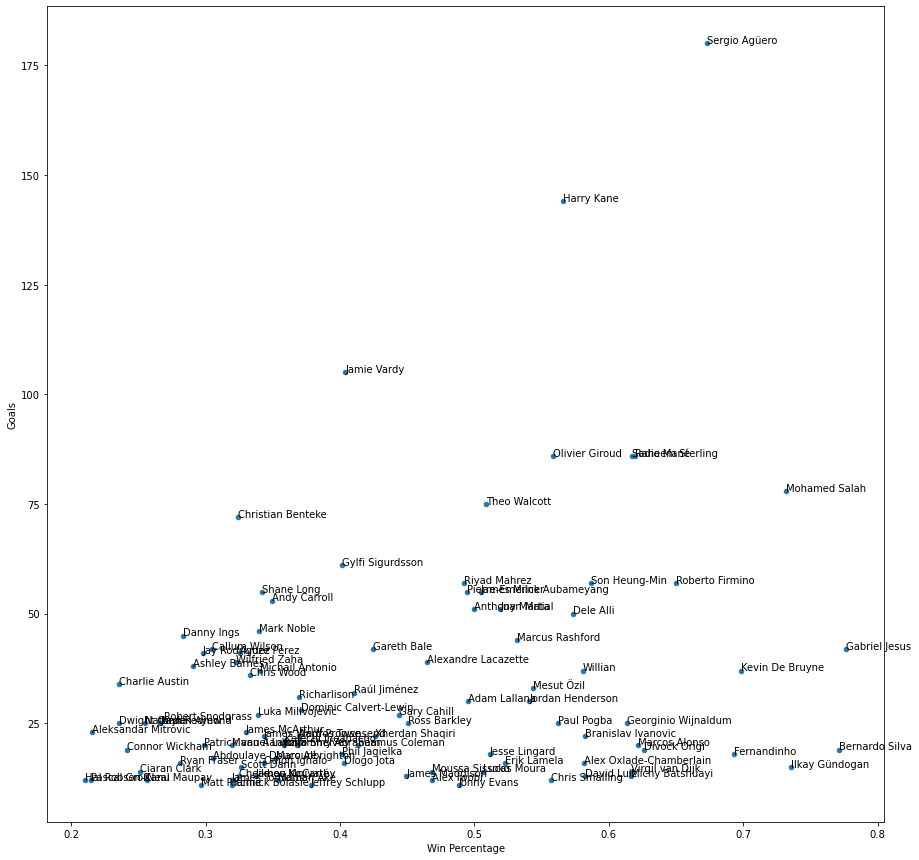

In [134]:
attack_first_team = df[(df['Goals']>10)] #get players with more than 10 goals
attack_first_team = attack_first_team.reset_index(drop=True) #reset the index after making new pandas
n=attack_first_team['Name']
z=attack_first_team['Win Percentage']
y=attack_first_team['Goals']
Scatter = attack_first_team.plot.scatter(x='Win Percentage',
                    y='Goals',
                    figsize=(15, 15))
for i, txt in enumerate(n):
    Scatter.annotate(txt, (z[i], y[i]))                     

An interesting piece that can be drawn from this comes from the comparison between teams with high win records and those with a low record. There are 5 players in the bottom right corner who play fro Man City Kevin De Brunye, Gabriel Jesus, Bernardo Silva, Ikay Gundogan and Fernandinho. None of them have a huge number of goals but still have they have a very high win rate, with instead most of the goals for Man City coming from Sergio Aguero. 

This contrasts with Liverpool players, who also have a somewhat high win rate and the team getting most of their goals from 3 players Salah, Sadio Mane and Roberto Firmino.

We can also look at Spurs who like Liverpool have 3 high scoring attacking players with high win-rates in Harry Kane, Deli Alli and Son Heung-Min.

Next if we look at players with less than a 50% win record, we see players like Jamie Vardy and Christan Benteke with high numbers of goals. From the graph what the other players have that they don't, is teammates with high numbers of goals.

So does the data show that a player that scores lots of goals will have a win rate? the answer is no. Instead what is more indictive of a player's win rate is the combined goals they and their teammates score.